In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Dataset/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df2=df[['Survived','Pclass','Age','Parch']]
df2.head()

,Survived,Pclass,Age,Parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [6]:
df3=df2.fillna(df2.mean())

In [7]:
X=df3.drop("Survived",axis=1)
y=df3["Survived"]
print('shape of X =', X.shape)
print('shape of y =', y.shape)

shape of X = (891, 3)
shape of y = (891,)


In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=51)
print('shape of X_train =', X_train.shape)
print('shape of X_test =', X_test.shape)
print('shape of y_train =', y_train.shape)
print('shape of y_test =', y_test.shape)

shape of X_train = (712, 3)
shape of X_test = (179, 3)
shape of y_train = (712,)
shape of y_test = (179,)


In [9]:
#Applying standardization
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [10]:
sc.mean_   #Getting mean value for 3 features

array([ 2.30617978, 29.55409121,  0.39185393])

In [11]:
sc.scale_  #Std Deviation for features

array([ 0.84405789, 12.99162985,  0.79647463])

In [12]:
X_train.describe()

,Pclass,Age,Parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [13]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [14]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [15]:
X_train_sc=pd.DataFrame(X_train_sc,columns=['Pclass','Age','Parch'])
X_test_sc=pd.DataFrame(X_test_sc,columns=['Pclass','Age','Parch'])

In [16]:
X_train_sc.head()

,Pclass,Age,Parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [17]:
X_train_sc.describe().round(2)  #Gives upto 2 degits,got mean=0,std dev=1

,Pclass,Age,Parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


# MinMaxScaler

In [18]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [19]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [20]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [21]:
X_train_mmc=pd.DataFrame(X_train_mmc, columns=['Pclass','Age','Parch'])
X_test_mmc=pd.DataFrame(X_test_mmc, columns=['Pclass','Age','Parch'])

In [22]:
X_train_mmc.head()

,Pclass,Age,Parch
0,1.0,0.334089,0.0
1,1.0,0.780391,0.0
2,1.0,0.149901,0.0
3,1.0,0.249079,0.0
4,1.0,0.414836,0.4


In [23]:
X_train_mmc.describe().round(2)

,Pclass,Age,Parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


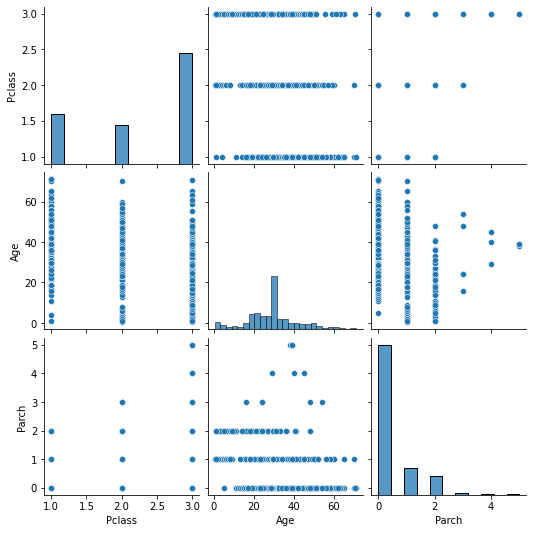

In [24]:
#Plotting original, standardised, normalised df
sns.pairplot(X_train)

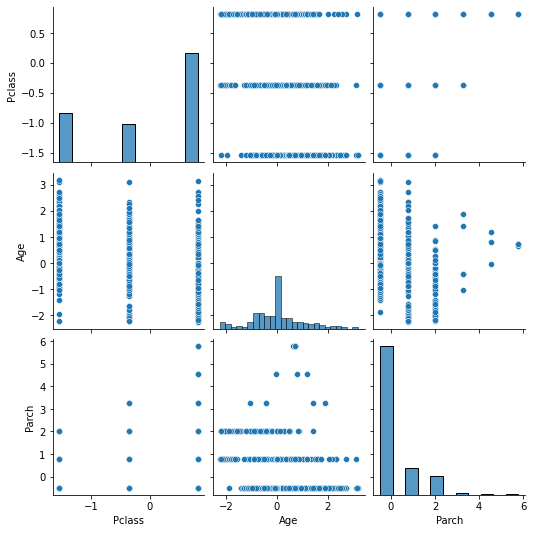

In [25]:
sns.pairplot(X_train_sc)

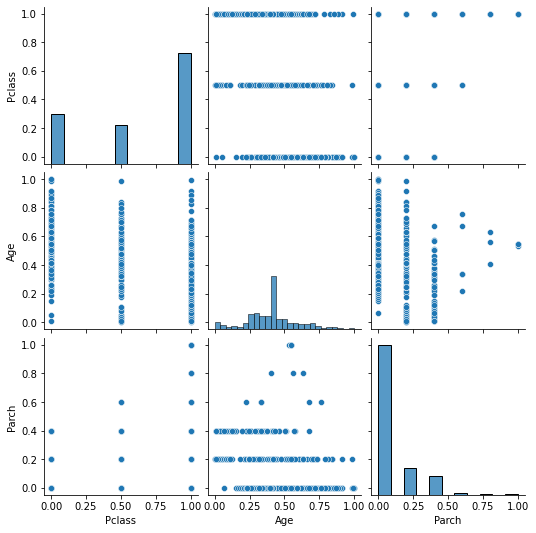

In [26]:
sns.pairplot(X_train_mmc)